In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

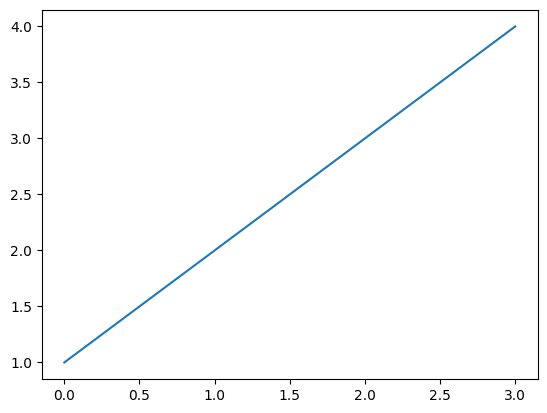

In [43]:
plt.plot([1, 2, 3, 4]);

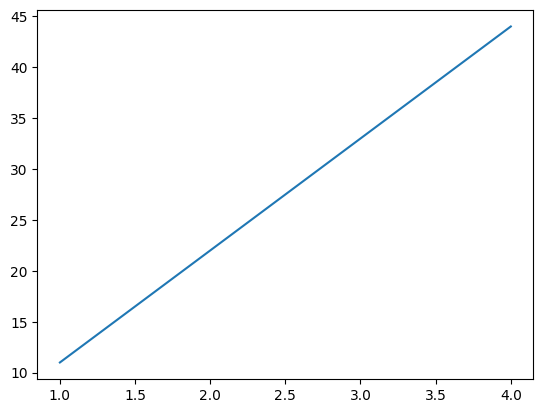

In [44]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

plt.plot(x, y);

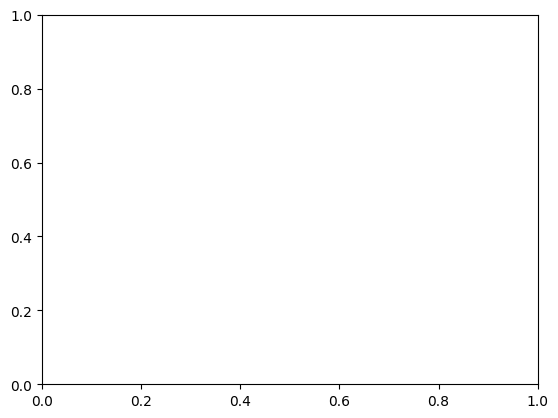

In [45]:
# 1st method
fig = plt.figure()  #Creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

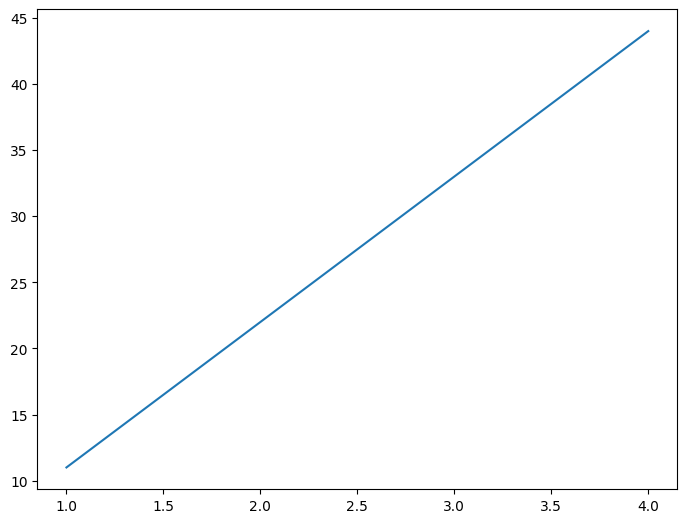

In [46]:
# 2nd method
fig = plt.figure() # Creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

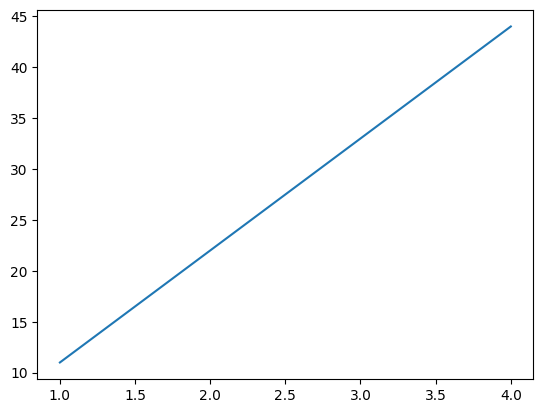

In [47]:
#3rd method
fig, ax = plt.subplots()
ax.plot(x, y);

## Matplotlib Workflow

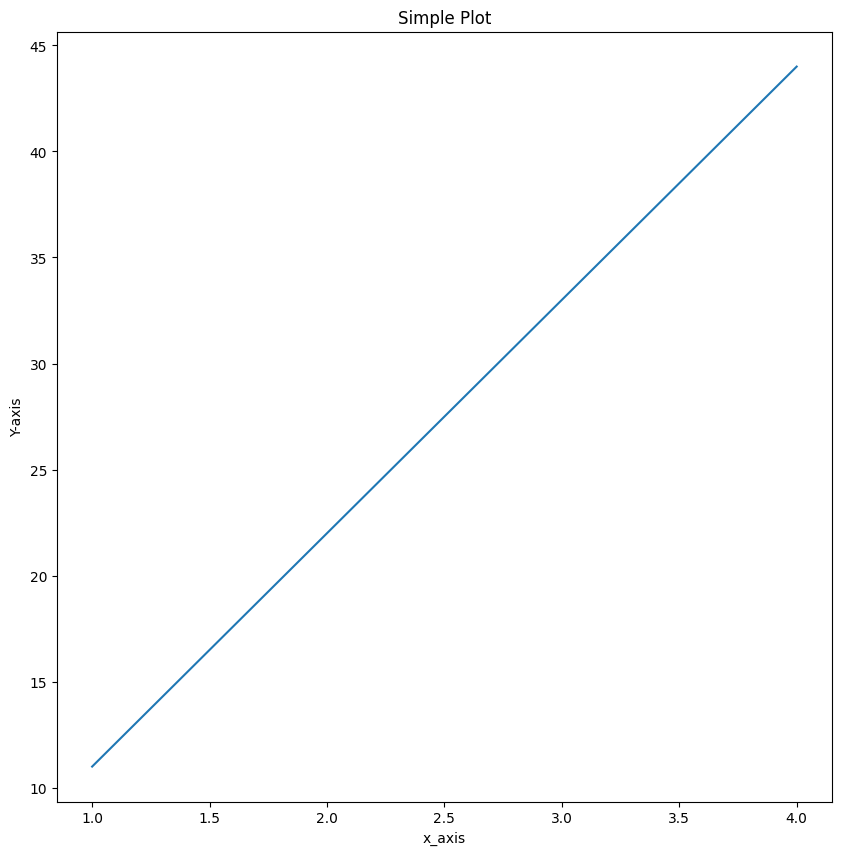

In [48]:
# 0. Import matplotlib and get it ready for plotting in jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare Data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup Plot
fig, ax = plt.subplots(figsize=(10, 10))  # (Width, Height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize Plot
ax.set(title="Simple Plot",
       xlabel="x_axis",
       ylabel="Y-axis")

# 5. Save & show 
fig.savefig("../images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line Plot
* Scatter Plot
* Bar Plot
* Histogram
* Subplots

In [49]:
import numpy as np

In [50]:
# Creates some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

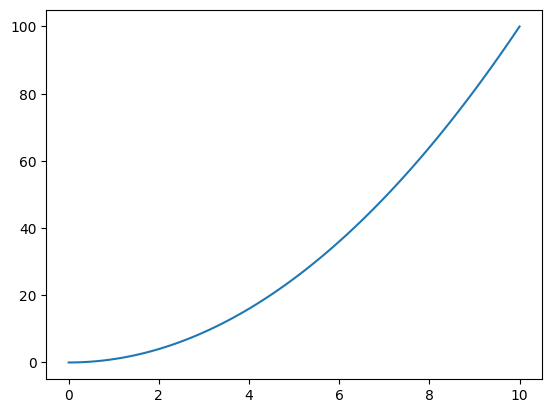

In [51]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2)

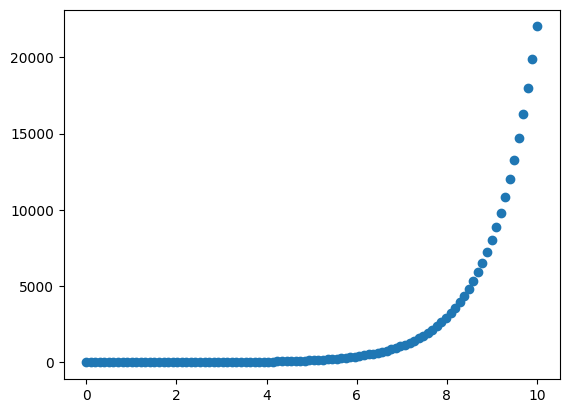

In [52]:
# Scatter Plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))

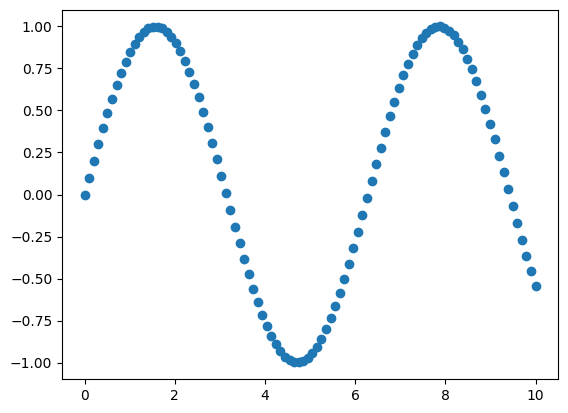

In [53]:
# Another Scatter Plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

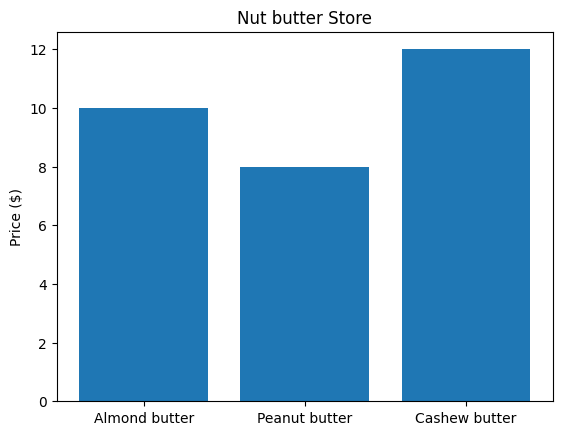

In [54]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10, 
                     "Peanut butter": 8,
                     "Cashew butter": 12}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) # (x, height)
ax.set(title="Nut butter Store",
       ylabel="Price ($)");

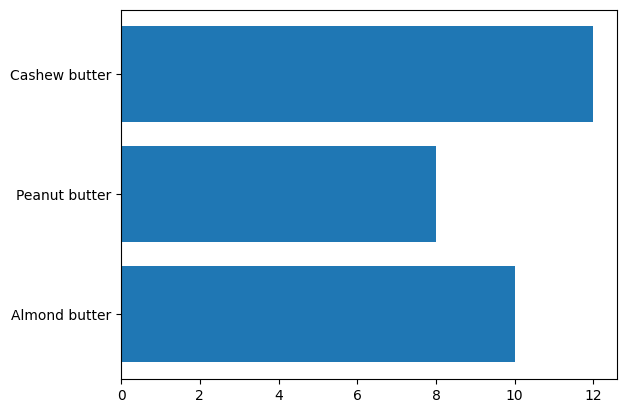

In [55]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values())); # Horizontal Bars

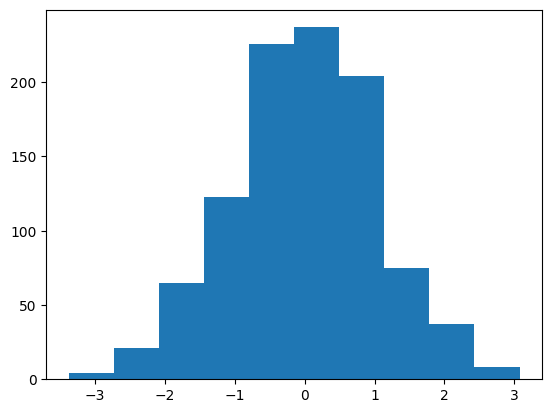

In [56]:
# Histogram
x = np.random.randn(1000)
fix, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

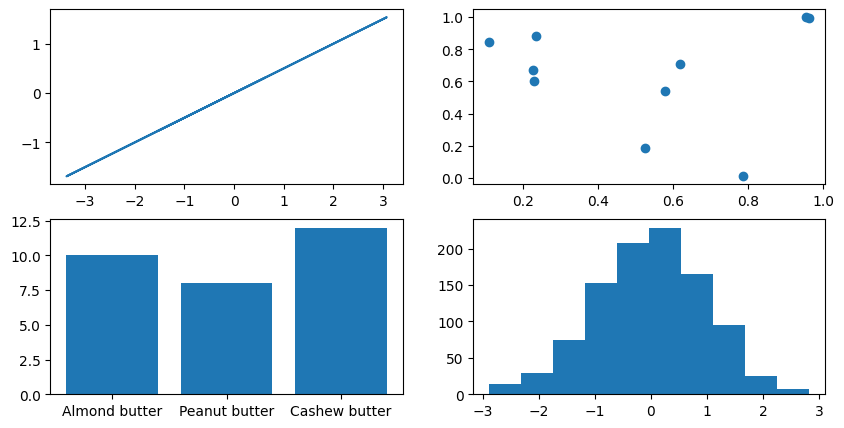

In [57]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))

ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

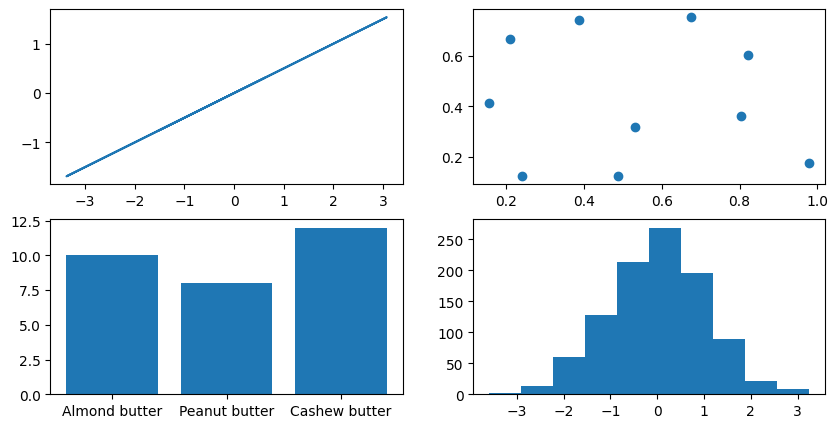

In [58]:
# Subpltots option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))
# Plot to each different axis
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [59]:
# Make a DataFrame
car_sales = pd.read_csv("../data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<Axes: >

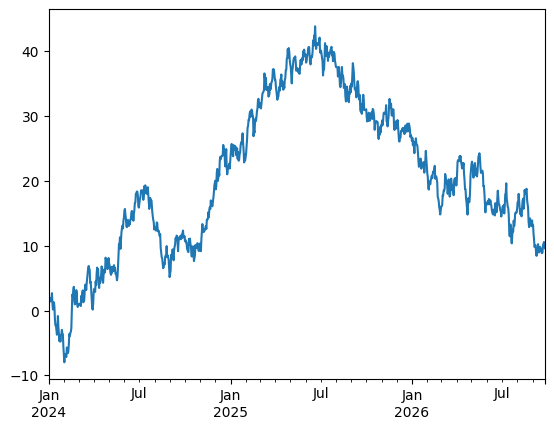

In [60]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2024", periods=1000))

ts = ts.cumsum()  # [2, 4, 6] => [2, 6, 12]

ts.plot()

In [62]:
car_sales["Price"] = car_sales["Price"].replace('[\$\,\.]', '', regex=True)
car_sales["Price"] = pd.to_numeric(car_sales["Price"])
car_sales["Price"] = car_sales["Price"] / 100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [63]:
car_sales["Sale Date"] = pd.date_range("1/1/2024", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000.0,2024-01-01
1,Honda,Red,87899,4,5000.0,2024-01-02
2,Toyota,Blue,32549,3,7000.0,2024-01-03
3,BMW,Black,11179,5,22000.0,2024-01-04
4,Nissan,White,213095,4,3500.0,2024-01-05
5,Toyota,Green,99213,4,4500.0,2024-01-06
6,Honda,Blue,45698,4,7500.0,2024-01-07
7,Honda,Blue,54738,4,7000.0,2024-01-08
8,Toyota,White,60000,4,6250.0,2024-01-09
9,Nissan,White,31600,4,9700.0,2024-01-10


In [64]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000.0,2024-01-01,4000.0
1,Honda,Red,87899,4,5000.0,2024-01-02,9000.0
2,Toyota,Blue,32549,3,7000.0,2024-01-03,16000.0
3,BMW,Black,11179,5,22000.0,2024-01-04,38000.0
4,Nissan,White,213095,4,3500.0,2024-01-05,41500.0
5,Toyota,Green,99213,4,4500.0,2024-01-06,46000.0
6,Honda,Blue,45698,4,7500.0,2024-01-07,53500.0
7,Honda,Blue,54738,4,7000.0,2024-01-08,60500.0
8,Toyota,White,60000,4,6250.0,2024-01-09,66750.0
9,Nissan,White,31600,4,9700.0,2024-01-10,76450.0


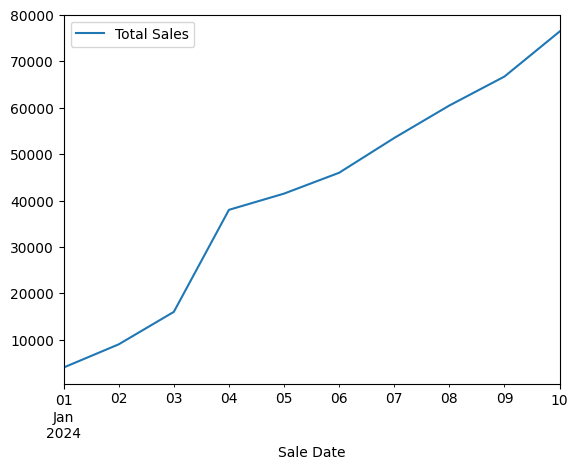

In [65]:
car_sales.plot(x="Sale Date", y="Total Sales");